## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

## Objective

* To come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 
* To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


## Data Description

The data contains the different attributes of used cars sold in different locations. 



### Importing necessary libraries

In [2]:
# %load_ext nb_black

# reading and manipulating data
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#model training
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

#model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings

warnings.filterwarnings("ignore")

In [3]:
# loading the dataset
data = pd.read_csv("used_cars_data.csv")

In [4]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

In [5]:
# let's view a sample of the data
data.sample(n=10)

S.No.                                               Name    Location  \
6670   6670                                  Renault Pulse RxZ  Coimbatore   
882     882                                  Hyundai i10 Magna      Jaipur   
520     520                                 Maruti Celerio VXI      Jaipur   
2629   2629                                  Maruti Ertiga ZDI   Hyderabad   
2550   2550                                  Maruti Ertiga ZDI       Delhi   
456     456                   Maruti S-Cross Delta DDiS 200 SH       Delhi   
3920   3920                   Skoda Octavia Classic 1.9 TDI MT        Pune   
1889   1889                               Honda City i VTEC SV      Mumbai   
6184   6184     Mercedes-Benz GL-Class 350 CDI Blue Efficiency       Kochi   
1799   1799  Mercedes-Benz E-Class 2009-2013 E250 CDI Elegance   Bangalore   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
6670  2014              31513    Diesel       Manual      First  23.08 kmpl   
882   2010              66770    Petrol       Manual     Second  20.36 kmpl   
520   2014              56000    Petrol       Manual      First   23.1 kmpl   
2629  2013             120000    Diesel       Manual      First  20.77 kmpl   
2550  2014              52000    Diesel       Manual      First  20.77 kmpl   
456   2018              12923    Diesel       Manual      First   25.1 kmpl   
3920  2005              88000    Diesel       Manual      Third   18.7 kmpl   
1889  2015              73070    Petrol       Manual      First   17.4 kmpl   
6184  2015              69095    Diesel    Automatic      First   11.3 kmpl   
1799  2013              29000    Diesel    Automatic      First  14.21 kmpl   

       Engine      Power  Seats  New_Price  Price  
6670  1461 CC  63.12 bhp    5.0      15.05    NaN  
882   1197 CC   78.9 bhp    5.0      10.25   2.60  
520    998 CC  67.04 bhp    5.0       5.87   2.79  
2629  1248 CC   88.8 bhp    7.0      11.27   7.00  
2550  1248 CC   88.8 bhp    7.0      11.27   5.95  
456   1248 CC   88.5 bhp    5.0      11.26   8.92  
3920  1896 CC     66 bhp    5.0      25.83   1.25  
1889  1497 CC  117.3 bhp    5.0      13.58   5.90  
6184  2987 CC  254.8 bhp    7.0      49.49    NaN  
1799  2143 CC    203 bhp    5.0      86.97  29.00

**Observations**

- `S.No.` is just an index for the data entry and will add no value to our analysis. So, we will drop it.

- `Name` contains a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

- `Mileage`, `Engine`, and `Power` columns will also need some processing before we are able to explore them. We'll have to extract numerical information from these columns.

In [6]:
df = data.copy()

In [7]:
df.drop("S.No.", axis=1, inplace=True)

In [8]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


**Observations**

- `Mileage`, `Engine`, and `Power` are *object* type columns when they should ideally be numerical.
- To be able to get summary statistics for these columns, we will have to process them first.

In [9]:
# checking for duplicate values
df.duplicated().sum()

1

- There is one duplicate value in the data.

In [10]:
df[df.duplicated(keep=False) == True]

Name Location  Year  Kilometers_Driven Fuel_Type  \
6498  Honda City 1.5 E MT   Mumbai  2010              52000    Petrol   
6582  Honda City 1.5 E MT   Mumbai  2010              52000    Petrol   

     Transmission Owner_Type    Mileage   Engine    Power  Seats  New_Price  \
6498       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0      13.58   
6582       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0      13.58   

      Price  
6498    NaN  
6582    NaN

**Observations**

- It is highly unlikely that both of them will have the same number of kilometers driven.
- Dropping

In [11]:
df.drop(6582, inplace=True)

## Data Preprocessing

### Processing columns

- Processing the `Mileage`, `Engine`, `Power`, and `New_Price` columns

**1. `Mileage`**

* We have car mileage in two units as per the data dictionary - kmpl and km/kg.

* After quick google search, it is clear that these 2 units are used for cars of 2 different fuel types.

    * kmpl (kilometers per liter) is used for petrol and diesel cars.
    * km/kg (kilometers per kg) is used for CNG and LPG-based engines.

* We have the variable `Fuel_type` in our data. We will check if these observations hold true in our data too.

In [12]:
df_mileage = df["Mileage"].str.split(" ", expand=True)
df_mileage.head()

0      1
0   26.6  km/kg
1  19.67   kmpl
2   18.2   kmpl
3  20.77   kmpl
4   15.2   kmpl

In [13]:
# let's verify units
df_mileage[1].value_counts()

kmpl     7176
km/kg      74
Name: 1, dtype: int64

In [14]:
# we will create two new columns for mileage values and units
df["mileage_num"] = df_mileage[0].astype(float)
df["mileage_unit"] = df_mileage[1]

# Checking the new dataframe
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  mileage_num mileage_unit  
0       5.51   1.75        26.60        km/kg  
1      16.06  12.50        19.67         kmpl  
2       8.61   4.50        18.20         kmpl  
3      11.27   6.00        20.77         kmpl  
4      53.14  17.74        15.20         kmpl

In [15]:
# Let's check if the units correspond to the fuel types
df.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3324
dtype: int64

* As expected, km/kg is for CNG/LPG cars and kmpl is for Petrol and Diesel cars.

**2. `Engine`**

* As per the data dictionary, the `Engine` column indicates the displacement volume of the engine in CC.
* Let's extract the numerical part of the column values.

In [16]:
df_engine = df["Engine"].str.split(" ", expand=True)

In [17]:
# we will create a new column for engine values
df["engine_num"] = df_engine[0].astype(float)

# Checking the new dataframe
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  mileage_num mileage_unit  engine_num  
0       5.51   1.75        26.60        km/kg       998.0  
1      16.06  12.50        19.67         kmpl      1582.0  
2       8.61   4.50        18.20         kmpl      1199.0  
3      11.27   6.00        20.77         kmpl      1248.0  
4      53.14  17.74        15.20         kmpl      1968.0

**3. `Power`**

* As per the data dictionary, the `Power` column indicates the maximum power of the engine in bhp.
* Let's extract the numerical part of the column values.

In [18]:
df_power = df["Power"].str.split(" ", expand=True)
df_power.head()

0    1
0  58.16  bhp
1  126.2  bhp
2   88.7  bhp
3  88.76  bhp
4  140.8  bhp

In [19]:
# we will create a new column for power values
df["power_num"] = df_power[0].astype(float)

# Checking the new dataframe
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  mileage_num mileage_unit  engine_num  power_num  
0       5.51   1.75        26.60        km/kg       998.0      58.16  
1      16.06  12.50        19.67         kmpl      1582.0     126.20  
2       8.61   4.50        18.20         kmpl      1199.0      88.70  
3      11.27   6.00        20.77         kmpl      1248.0      88.76  
4      53.14  17.74        15.20         kmpl      1968.0     140.80

- We have extracted numerical values from the `Mileage`, `Engine`, and `Power` columns.

### Feature Engineering

- The `Name` column in the current format might not be very useful in our analysis.
- Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction.

In [20]:
# checking number of unique values
df["Name"].nunique()

2041

- With 2041 unique names, car names are not going to be great predictors of the price in our current data.

- But we can extract important information and see if that reduces the number of levels for this information.

#### 1. Car Brand Name

In [21]:
# extracting brand names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  mileage_num mileage_unit  engine_num  power_num    Brand  
0       5.51   1.75        26.60        km/kg       998.0      58.16   maruti  
1      16.06  12.50        19.67         kmpl      1582.0     126.20  hyundai  
2       8.61   4.50        18.20         kmpl      1199.0      88.70    honda  
3      11.27   6.00        20.77         kmpl      1248.0      88.76   maruti  
4      53.14  17.74        15.20         kmpl      1968.0     140.80     audi

In [22]:
# checking the unique values of brands
df["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             742
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

- There are 32 brands of cars in the data.

#### 2. Car Model Name

In [23]:
# extracting model names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  mileage_num mileage_unit  engine_num  power_num    Brand  \
0       5.51   1.75        26.60        km/kg       998.0      58.16   maruti   
1      16.06  12.50        19.67         kmpl      1582.0     126.20  hyundai   
2       8.61   4.50        18.20         kmpl      1199.0      88.70    honda   
3      11.27   6.00        20.77         kmpl      1248.0      88.76   maruti   
4      53.14  17.74        15.20         kmpl      1968.0     140.80     audi   

    Model  
0   wagon  
1   creta  
2    jazz  
3  ertiga  
4      a4

In [24]:
# checking the unique values and their number of occurences
df["Model"].value_counts()

swift      418
city       317
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

- There are 218 different car models in the data.

## Handling missing values

In [25]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1233
mileage_num             2
mileage_unit            2
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

**Observations**

* 2 cars don't have entries for Mileage.

* Engine displacement information of 46 observations is missing, the maximum power of 175 entries is missing, and information about the number of seats is not available for 53 entries.

* Price is also missing for 1233 entries. Since `Price` is the target variable to predict, drop these to build a model.
    - while analyzing the distributions and doing missing value imputations, i'll keep using information from these rows.

In [26]:
# dropping the redundant columns.
df.drop(columns=["Mileage", "Engine", "Power"], inplace=True)

**Let's check the statistical summary of the numerical variables.**

In [27]:
df.describe().T

count          mean           std      min       25%  \
Year               7252.0   2013.365830      3.254405  1996.00   2011.00   
Kilometers_Driven  7252.0  58699.986900  84433.505524   171.00  34000.00   
Seats              7199.0      5.279761      0.811709     0.00      5.00   
New_Price          7252.0     21.308387     24.257816     3.91      7.88   
Price              6019.0      9.479468     11.187917     0.44      3.50   
mileage_num        7250.0     18.141738      4.562492     0.00     15.17   
engine_num         7206.0   1616.590064    595.324779    72.00   1198.00   
power_num          7077.0    112.764474     53.497297    34.20     75.00   

                        50%         75%         max  
Year                2014.00   2016.0000     2019.00  
Kilometers_Driven  53429.00  73000.0000  6500000.00  
Seats                  5.00      5.0000       10.00  
New_Price             11.30     21.6975      375.00  
Price                  5.64      9.9500      160.00  
mileage_num           18.16     21.1000       33.54  
engine_num          1493.00   1968.0000     5998.00  
power_num             94.00    138.1000      616.00

**Observations**

1. `Kilometers_Driven` values have an incredibly high range. We should check a few of the extreme values to get a sense of the data.

2. The minimum and the maximum number of seats in the car also warrant a quick check. On average, a car seems to have 5 seats, which is about right.

3. We have used cars being sold at less than a lakh INR and as high as 160 lakh INR, as we saw for the Lamborghini earlier. We might have to check for outliers to build a robust model.

4. The minimum mileage being 0 is also concerning. We'll have to check what is going on.

5. Engine and Power mean and median values are not very different. Only someone with more domain knowledge would be able to comment further on these attributes.

6. The new price range seems right. We have both budget-friendly Maruti cars and Lamborghinis in our stock. Mean being almost twice that of the median suggests that there are only a few very high range brands, which again makes sense.

In [28]:
# checking extreme values in Kilometers_Driven
df.sort_values(by=["Kilometers_Driven"], ascending=False).head()

Name Location  Year  \
2328                        BMW X5 xDrive 30d M Sport  Chennai  2017   
340            Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline  Chennai  2013   
358                             Hyundai i10 Magna 1.2  Chennai  2009   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  Chennai  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  New_Price  \
2328            6500000    Diesel    Automatic      First    5.0      55.07   
340              775000    Diesel    Automatic      First    5.0      25.83   
1860             720000    Diesel       Manual      First    5.0      13.23   
358              620000    Petrol       Manual      First    5.0      10.25   
2823             480000    Diesel    Automatic      First    5.0      10.15   

      Price  mileage_num mileage_unit  engine_num  power_num       Brand  \
2328   65.0        15.97         kmpl      2993.0     258.00         bmw   
340     7.5        19.30         kmpl      1968.0     141.00       skoda   
1860    5.9        20.54         kmpl      1598.0     103.60  volkswagen   
358     2.7        20.36         kmpl      1197.0      78.90     hyundai   
2823   13.0        16.96         kmpl      1968.0     138.03  volkswagen   

        Model  
2328       x5  
340   octavia  
1860    vento  
358       i10  
2823    jetta

**Observations**

* It looks like the first row here is a data entry error. A car manufactured as recently as 2017 having been driven 6,500,000 km is almost impossible.
    - treating this as an anomalous value, replace it by NaN, and impute it later.

* The other observations that follow are also on a higher end. There is a good chance that these are outliers.

In [29]:
df.loc[2328, "Kilometers_Driven"] = np.nan

In [30]:
# checking extreme values in Kilometers_Driven
df.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

Name   Location  Year  \
1361                    Maruti Alto 800 2016-2019 VXI     Mumbai  2019   
5606                       Maruti Wagon R ZXI AMT 1.2     Mumbai  2019   
1598                             Tata Xenon XT EX 4X2     Jaipur  2017   
1161                      Tata Tigor 1.2 Revotron XTA  Ahmedabad  2018   
1198                Volkswagen Polo 1.0 MPI Trendline  Hyderabad  2019   
1242                   Jaguar XE 2.0L Diesel Prestige      Delhi  2018   
5941                                 Renault KWID RXL       Pune  2018   
6201                                  Maruti Alto LXI    Kolkata  2019   
6760  Fiat Avventura Urban Cross 1.3 Multijet Emotion    Kolkata  2019   
173                  Hyundai Grand i10 1.2 Kappa Asta    Kolkata  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  New_Price  \
1361              171.0    Petrol       Manual      First    5.0       4.36   
5606              600.0    Petrol    Automatic      First    5.0       6.80   
1598             1000.0    Diesel       Manual      First    5.0       7.63   
1161             1000.0    Petrol    Automatic      First    5.0       7.15   
1198             1000.0    Petrol       Manual      First    5.0       6.74   
1242             1000.0    Diesel    Automatic      First    5.0      52.77   
5941             1000.0    Petrol       Manual      First    5.0       4.45   
6201             1000.0    Petrol       Manual      First    5.0       3.99   
6760             1000.0    Diesel       Manual      First    5.0       9.26   
173              1000.0    Petrol       Manual      First    5.0       7.39   

      Price  mileage_num mileage_unit  engine_num  power_num       Brand  \
1361   3.60        24.70         kmpl       796.0      47.30      maruti   
5606   6.25        21.50         kmpl      1197.0      81.80      maruti   
1598   7.50        13.49         kmpl      2179.0     138.03        tata   
1161   6.85        20.30         kmpl      1199.0      84.00        tata   
1198   5.68        18.78         kmpl       999.0      75.00  volkswagen   
1242  40.00        13.60         kmpl      1999.0     177.00      jaguar   
5941   3.40        25.17         kmpl       799.0      53.30     renault   
6201    NaN        24.70         kmpl       796.0      47.30      maruti   
6760    NaN        20.50         kmpl      1248.0      91.72        fiat   
173    6.50        18.90         kmpl      1197.0      81.86     hyundai   

          Model  
1361       alto  
5606      wagon  
1598      xenon  
1161      tigor  
1198       polo  
1242         xe  
5941       kwid  
6201       alto  
6760  avventura  
173       grand

**Observations**

* After looking at the columns `Year`, `New_Price`, and `Price`, these entries seem feasible.

* 1000 might be the default value in this case. Quite a few cars having driven exactly 1000 km is suspicious.

In [31]:
# checking extreme values in Seats
df.sort_values(by=["Seats"], ascending=True).head(5)

Name   Location  Year  Kilometers_Driven  \
3999  Audi A4 3.2 FSI Tiptronic Quattro  Hyderabad  2012           125000.0   
926          Porsche Cayman 2009-2012 S  Hyderabad  2010            10000.0   
134            Mercedes-Benz SLC 43 AMG    Kolkata  2017            13372.0   
1078        Porsche Boxster S tiptronic    Kolkata  2015            10512.0   
798     Mercedes-Benz SLK-Class SLK 350  Bangalore  2015            10000.0   

     Fuel_Type Transmission Owner_Type  Seats  New_Price  Price  mileage_num  \
3999    Petrol    Automatic      First    0.0      53.14   18.0         10.5   
926     Petrol       Manual      First    2.0     136.00   40.0          9.0   
134     Petrol    Automatic      First    2.0      95.04   54.0         19.0   
1078    Petrol    Automatic      First    2.0     136.00   64.0          8.6   
798     Petrol    Automatic      First    2.0      49.49   55.0         18.1   

     mileage_unit  engine_num  power_num          Brand      Model  
3999         kmpl      3197.0        NaN           audi         a4  
926          kmpl      3436.0        NaN        porsche     cayman  
134          kmpl      2996.0     362.07  mercedes-benz        slc  
1078         kmpl      2706.0     265.00        porsche    boxster  
798          kmpl      3498.0     306.00  mercedes-benz  slk-class

**Observations**

* Audi A4 having 0 seats is clearly a data entry error.
  * Complete with available data?
* Overall, there doesn't seem not much to be concerned about here.

In [32]:
df[df["Name"].str.startswith("Audi A4")]

Name    Location  Year  \
4                   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
50             Audi A4 2.0 TDI 177 Bhp Premium Plus       Kochi  2015   
65                      Audi A4 2.0 TDI Multitronic      Jaipur  2012   
103                 Audi A4 3.0 TDI Quattro Premium     Kolkata  2010   
150            Audi A4 2.0 TDI 177 Bhp Premium Plus  Coimbatore  2015   
...                                             ...         ...   ...   
6975                Audi A4 3.0 TDI Quattro Premium   Bangalore  2011   
7023  Audi A4 2.0 TDI Premium Sport Limited Edition   Bangalore  2014   
7168                                Audi A4 2.0 TDI   Bangalore  2014   
7233                                Audi A4 2.0 TDI   Bangalore  2014   
7238                                Audi A4 2.0 TDI   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  New_Price  \
4               40670.0    Diesel    Automatic     Second    5.0      53.14   
50              13648.0    Diesel    Automatic      First    5.0      53.14   
65              65664.0    Diesel    Automatic      First    5.0      53.14   
103             30000.0    Diesel    Automatic      First    5.0      53.14   
150             48214.0    Diesel    Automatic      First    5.0      53.14   
...                 ...       ...          ...        ...    ...        ...   
6975            45000.0    Diesel    Automatic      First    5.0      53.14   
7023            36000.0    Diesel    Automatic      First    5.0      53.14   
7168            65475.0    Diesel    Automatic      First    5.0      53.14   
7233            21143.0    Diesel    Automatic      First    5.0      53.14   
7238            64000.0    Diesel    Automatic      First    5.0      53.14   

      Price  mileage_num mileage_unit  engine_num  power_num Brand Model  
4     17.74        15.20         kmpl      1968.0     140.80  audi    a4  
50    21.43        17.11         kmpl      1968.0     174.33  audi    a4  
65    13.50        16.55         kmpl      1968.0     140.00  audi    a4  
103    9.80        14.94         kmpl      2967.0     241.40  audi    a4  
150   23.32        17.11         kmpl      1968.0     174.33  audi    a4  
...     ...          ...          ...         ...        ...   ...   ...  
6975    NaN        14.94         kmpl      2967.0     241.40  audi    a4  
7023    NaN        17.11         kmpl      1968.0     174.33  audi    a4  
7168    NaN        16.55         kmpl      1968.0     147.51  audi    a4  
7233    NaN        16.55         kmpl      1968.0     147.51  audi    a4  
7238    NaN        16.55         kmpl      1968.0     147.51  audi    a4  

[90 rows x 16 columns]

* Looks like an Audi A4 typically has 5 seats.

In [33]:
# replacing #seats in row index 3999 form 0 to 5
df.loc[3999, "Seats"] = 5.0

In [34]:
# checking extreme values in Seats
df.sort_values(by=["Seats"], ascending=False).head()

Name   Location  Year  \
2575  Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2015   
6875                    Toyota Qualis FS B3       Pune  2002   
2267                    Toyota Qualis RS E2       Pune  2004   
1907                    Toyota Qualis FS B3  Bangalore  2002   
6288  Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2005   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  New_Price  \
2575           120000.0    Diesel       Manual      First   10.0      11.30   
6875           119613.0    Diesel       Manual     Second   10.0      24.01   
2267           215750.0    Diesel       Manual     Second   10.0      24.01   
1907            63000.0    Diesel       Manual      Third   10.0      24.01   
6288           150000.0    Diesel       Manual     Second   10.0      11.30   

      Price  mileage_num mileage_unit  engine_num  power_num      Brand  \
2575   5.50         14.8         kmpl      2499.0       80.0  chevrolet   
6875    NaN         13.1         kmpl      2446.0       75.0     toyota   
2267   3.50          0.0         kmpl      2446.0        NaN     toyota   
1907   3.65         13.1         kmpl      2446.0       75.0     toyota   
6288    NaN         14.8         kmpl      2499.0       80.0  chevrolet   

       Model  
2575  tavera  
6875  qualis  
2267  qualis  
1907  qualis  
6288  tavera

* A Toyota Qualis does have 10 seats and so does a Tata Sumo. All good.

In [35]:
# checking extreme values in Mileage
df.sort_values(by=["mileage_num"], ascending=True).head(10)

Name    Location  Year  \
307                Hyundai Santro Xing XL     Chennai  2006   
3210  Mercedes-Benz M-Class ML 350 4Matic  Coimbatore  2016   
3271               Hyundai Santro Xing GL   Bangalore  2008   
3516        Hyundai Santro GLS I - Euro I        Pune  2011   
3522      Hyundai Santro GLS II - Euro II       Kochi  2012   
3645               Hyundai Santro Xing XP   Bangalore  2004   
4152         Land Rover Range Rover 3.0 D      Mumbai  2003   
4234  Mercedes-Benz M-Class ML 350 4Matic     Chennai  2012   
4302               Hyundai Santro Xing GL       Delhi  2012   
262                Hyundai Santro Xing XL   Hyderabad  2006   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  New_Price  \
307             58000.0    Petrol       Manual     Second    5.0       4.55   
3210            22769.0    Diesel    Automatic      First    5.0      49.49   
3271            35268.0    Petrol       Manual     Second    5.0       4.55   
3516            65400.0    Petrol       Manual      First    5.0       4.55   
3522            66400.0    Petrol       Manual      First    NaN       4.55   
3645           167000.0    Petrol       Manual      First    5.0       4.55   
4152            75000.0    Diesel    Automatic     Second    NaN     120.00   
4234            63000.0    Diesel    Automatic      First    5.0      49.49   
4302            61449.0    Petrol       Manual      First    5.0       4.55   
262             99000.0    Petrol       Manual      First    5.0       4.55   

      Price  mileage_num mileage_unit  engine_num  power_num          Brand  \
307    1.50          0.0         kmpl      1086.0        NaN        hyundai   
3210  49.22          0.0         kmpl      2987.0      165.0  mercedes-benz   
3271   1.88          0.0         kmpl      1086.0       62.0        hyundai   
3516   2.10          0.0         kmpl      1086.0        NaN        hyundai   
3522   2.66          0.0         kmpl         NaN        NaN        hyundai   
3645   1.35          0.0         kmpl      1086.0        NaN        hyundai   
4152  16.11          0.0         kmpl         NaN        NaN           land   
4234  26.00          0.0         kmpl      2987.0      165.0  mercedes-benz   
4302   2.15          0.0         kmpl      1086.0       62.0        hyundai   
262    1.75          0.0         kmpl      1086.0        NaN        hyundai   

        Model  
307    santro  
3210  m-class  
3271   santro  
3516   santro  
3522   santro  
3645   santro  
4152    rover  
4234  m-class  
4302   santro  
262    santro

* Will have to treat Mileage = 0 as missing values

In [36]:
# Let us replace 0 values in mileage_num by NaN
df.loc[df.mileage_num == 0, "mileage_num"] = np.nan

In [37]:
# checking extreme values in Mileage
df.sort_values(by=["mileage_num"], ascending=False).head()

Name Location  Year  Kilometers_Driven Fuel_Type  \
2371  Maruti Wagon R CNG LXI     Pune  2014            29202.0       CNG   
3129  Maruti Wagon R CNG LXI    Delhi  2014            74663.0       CNG   
2059  Maruti Wagon R CNG LXI   Mumbai  2013            54000.0       CNG   
1332  Maruti Wagon R CNG LXI     Pune  2013            79494.0       CNG   
4141  Maruti Wagon R CNG LXI   Mumbai  2014            47200.0       CNG   

     Transmission Owner_Type  Seats  New_Price  Price  mileage_num  \
2371       Manual      First    5.0       5.54   3.90        33.54   
3129       Manual      First    5.0       5.35   3.25        33.54   
2059       Manual      First    5.0       5.58   3.05        33.54   
1332       Manual      First    5.0       5.54   2.96        33.54   
4141       Manual      First    5.0       5.58   2.85        33.54   

     mileage_unit  engine_num  power_num   Brand  Model  
2371        km/kg       998.0      67.04  maruti  wagon  
3129        km/kg       998.0      67.04  maruti  wagon  
2059        km/kg       998.0      67.04  maruti  wagon  
1332        km/kg       998.0      67.04  maruti  wagon  
4141        km/kg       998.0      67.04  maruti  wagon

* Maruti Wagon R and Maruti Alto CNG versions are budget-friendly cars with high mileage, so these data points are fine.

In [38]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.
-------------------------------------------------- 

Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       5203
Automatic    2049
Name: Transmission, dtype: int64
-------------

- Why didn't the 2 electric cars show up when checking different `Fuel_Type` earlier?

In [39]:
df.loc[df["Fuel_Type"] == "Electric"]

Name Location  Year  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai  2016            50000.0  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011            44000.0  Electric   

     Transmission Owner_Type  Seats  New_Price  Price  mileage_num  \
4446    Automatic      First    5.0      13.58  13.00          NaN   
4904    Automatic      First    5.0      24.01  12.75          NaN   

     mileage_unit  engine_num  power_num     Brand  Model  
4446          NaN        72.0       41.0  mahindra      e  
4904          NaN      1798.0       73.0    toyota  prius

**Observations**

* Mileage values for these cars are NaN, so *groupby()* ignored it.

* Barely any data on electric cars so better to drop it. Good chance the prediction model will not be able to handle electric cars anyway

In [40]:
# checking used car prices grouped by brand
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

**Observations**

* Following known brands, this data tracks

**Creating the new columns that are log transformed to address the large spread**

In [41]:
# Creating a new column with the transformed variable
df["price_log"] = np.log(df["Price"])

In [42]:
df["new_price_log"] = np.log(df["New_Price"])

In [43]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

In [44]:
# dropping the redundant columns
df.drop(columns=["Name", "mileage_unit"], inplace=True)

In [45]:
## Creating a copy of data to perform EDA in the apendix section
df1 = df.copy()

## EDA

In [46]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [47]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

**Data Description:**

- The target variable (`Price`) is of *float* type.
- `Fuel_Type`, `Transmission`, and `Owner` are of *object* type.
- `Mileage`, `Engine`, `Power`, and `New_Price` are *object* type columns when they should ideally be numerical.
- All other columns are numeric in nature.
- There is one duplicate value in the data, which was dropped.
- There are a lot of missing values in the data.


**Data Cleaning:**

- The `Sl.No` column is dropped as it is a unique identifier for rows and does not add any value to the analysis.
- The `Mileage`, `Engine`, and `Power` columns were converted from string to numeric by extracting numerical values and discarding the units.
- `Brand` and `Model` were extracted from the `Name` column and the original column was then dropped.
- Anomalous values in columns like `Mileage`, `Seats`, and `Kilometers_driven` were treated as missing values.
- The missing values in the data are treated as follows:
    - Missing values in the target variable `Price` were dropped.
    - Missing values in numerical columns were imputed by the median values grouped by the `Brand` and `Model` name. Remaining missing values in these columns, if any, were imputed by the median values grouped by the `Brand` name. Any leftover missing values were imputed by column medians over entire data.


**Observations from Univariate EDA:**


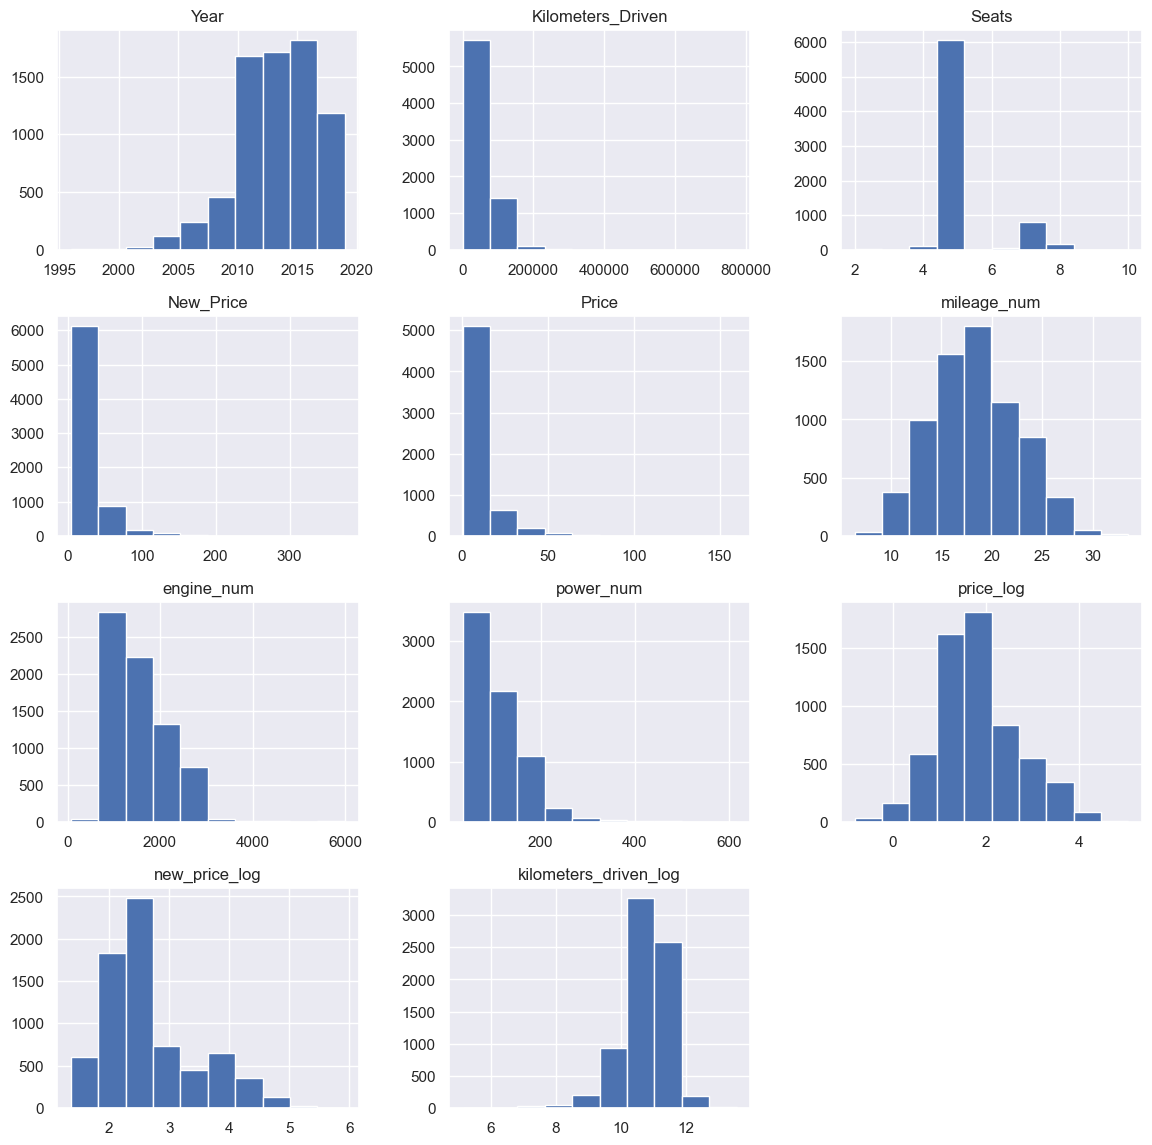

In [48]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

- `Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 53.5 lakh INR. The log transformation was applied on this column to reduce skewness. The displacement volume of the engine, the maximum power of the engine and the price of a new car of the same model is highly correlated with the price of a used car.
- `Mileage`: This attribute has a close to normally distribution. With increase in mileage, the engine displacement and power decrease.
- `Engine`: There are a few upper outliers, indicating that there are a few car with a higher engine displacement volume. Higher priced cars have higher engine displacement. It is also highly correlated with the maximum engine power.
- `Power`: There are a few upper outliers, indicating that there are a few car with a higher power. Higher priced cars have higher maximum power. It is also highly correlated with the engine displacement volume.
- `Kilometers_driven`: The number of kilometers a used car is driven has a highly skewed distribution, with a median value of around 53.5 thousand. The log transformation was applied on this column to reduce skewness.
- `New_Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 11.3 lakh INR. The log transformation was applied on this column to reduce skewness.
- `Seats`: 84% of the cars in the dataset are 5-seater cars.
- `Year`: More than half the cars in the data were manufactured in or after 2014. The price of used cars has increased over the years.
- `Brand`: Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.
- `Model`: Maruti Swift is the most common car up for resale. The dataset contains used cars from luxury as well as budget-friendly brands.
- `Location`: Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.
- `Fuel_Type`: Around 1% of the cars in the dataset do not run on diesel or petrol. Electric cars have the highest median price, followed by diesel cars.
- `Transmission`: More than 70% of the cars have manual transmission. The price is higher for used cars with automatic transmission.
- `Owner_Type`: More than 80% of the used cars are being sold for the first time. The price of cars decreases as they keep getting resold.

**Observations from Bivariate EDA:**

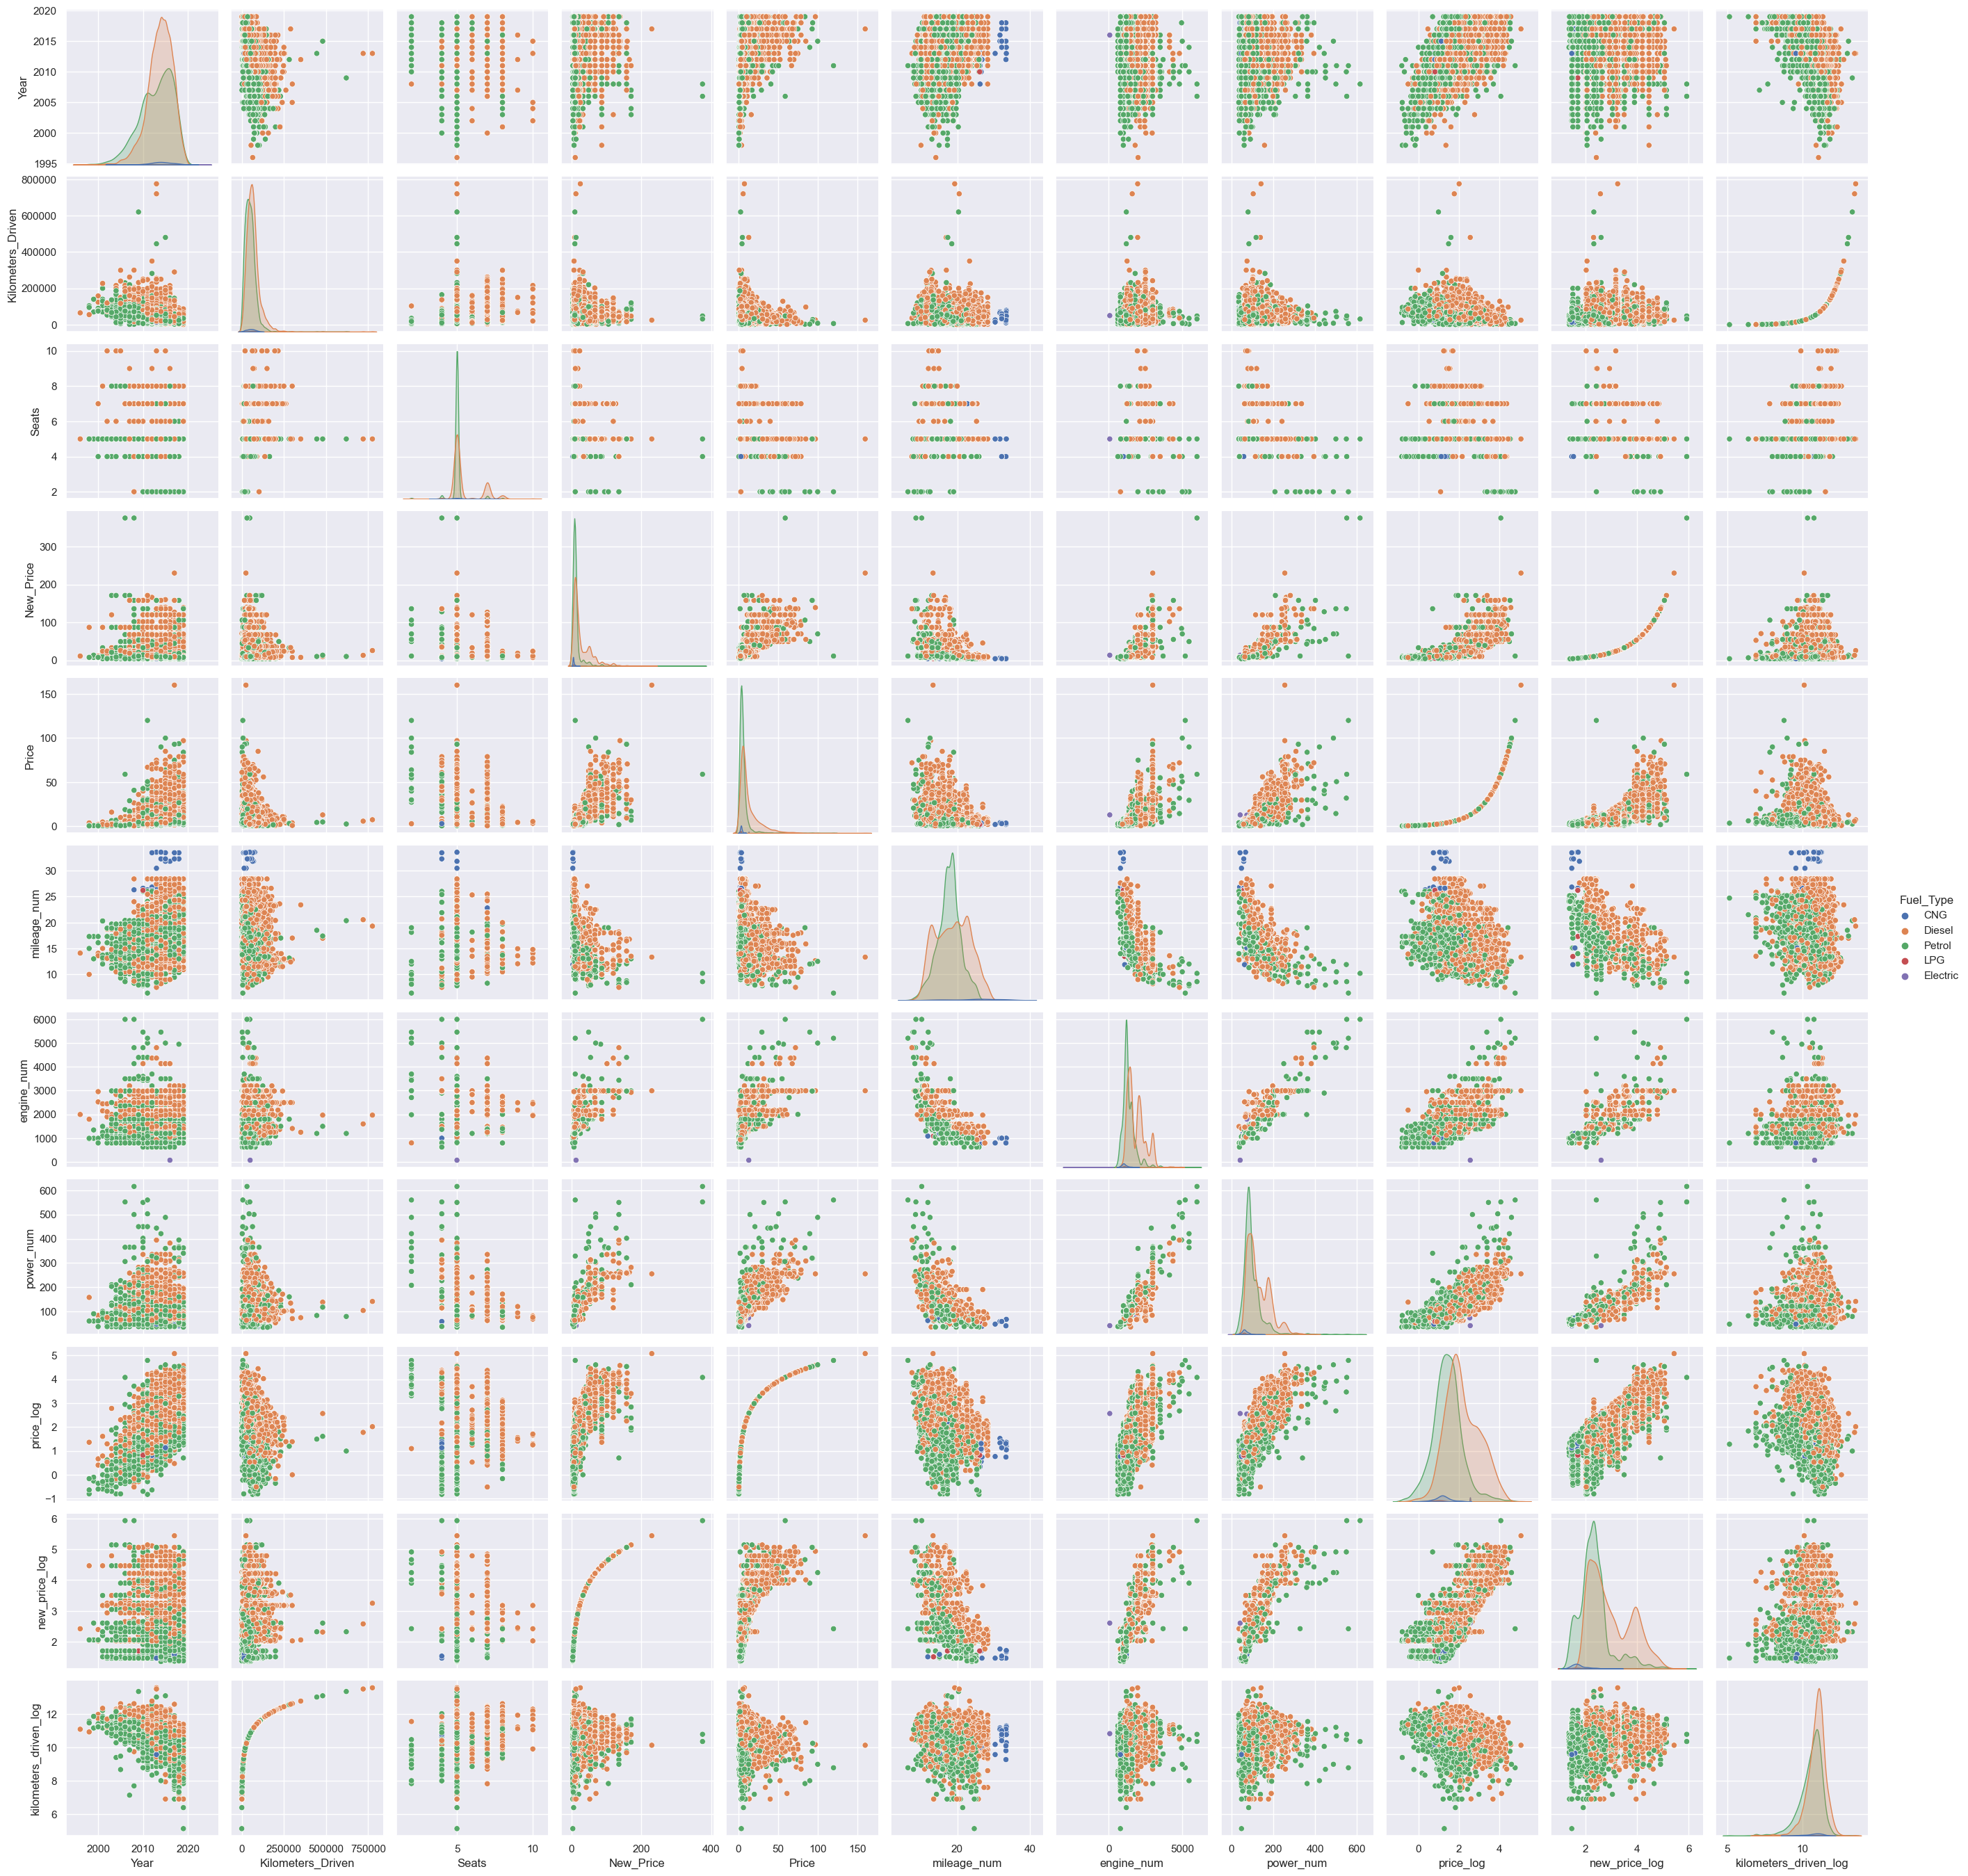

In [49]:
sns.pairplot(data=df, hue="Fuel_Type")
plt.show()


Zooming into these plots gives us a lot of information.

- Contrary to intuition, `Kilometers_Driven` does not seem to have a relationship with the price.
- `Price` has a positive relationship with `Year`, i.e., the newer the car, the higher the price.
    - The temporal element of variation is captured in the year column.

- 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
- Mileage does not seem to show much relationship with the price of used cars.
- Engine displacement and power of the car have a positive relationship with the price.
- `New_Price` and used car price are also positively correlated, which is expected.
- `Kilometers_Driven` has a peculiar relationship with the `Year` variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
- CNG cars are conspicuous outliers when it comes to `Mileage`. The mileage of these cars is very high.
- The mileage and power of newer cars are increasing owing to advancements in technology.
- Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

**`Price` vs `Year`**

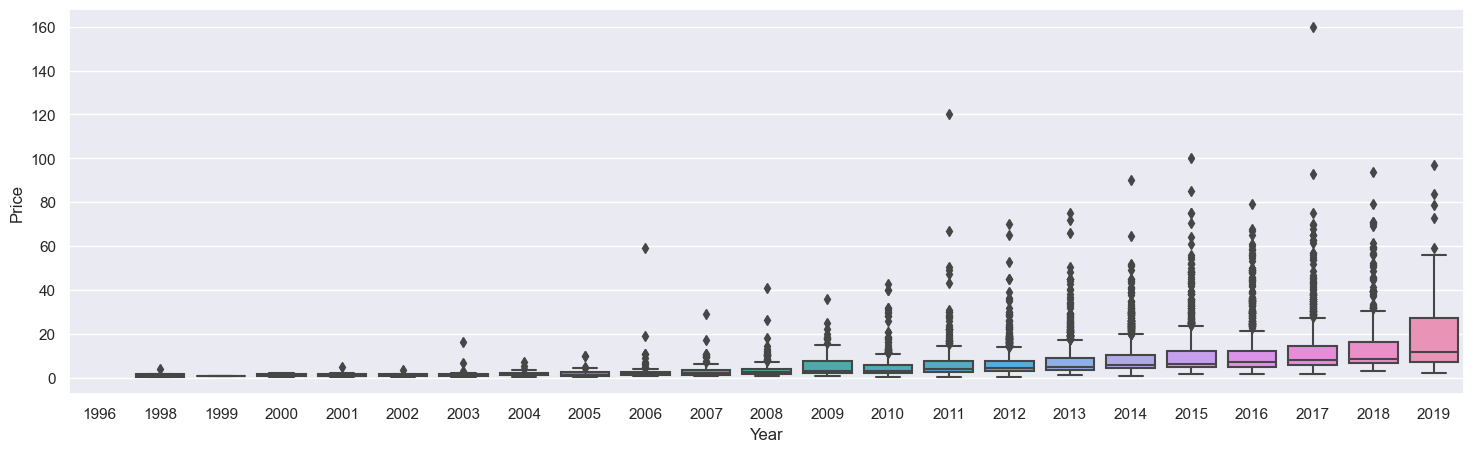

In [50]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df1)
plt.show()

* The price of used cars has increased over the years.

**`Price` vs `Brand`**

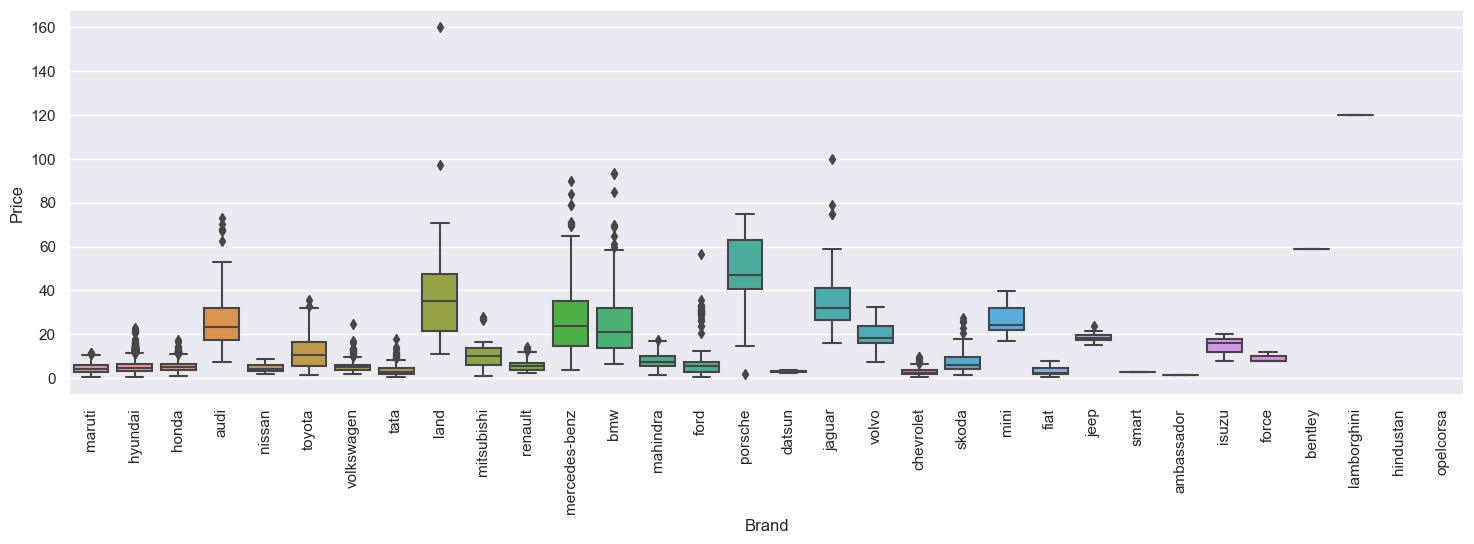

In [51]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

**`Price` vs `Transmission`**

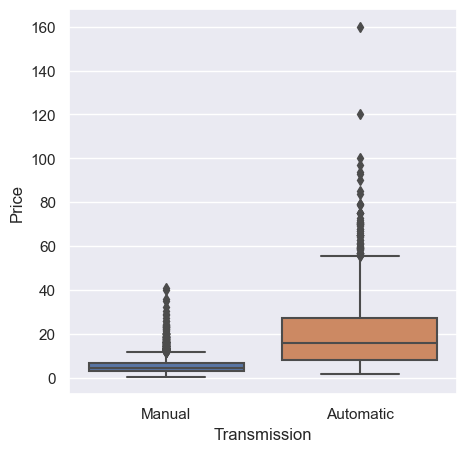

In [52]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df)
plt.show()

* The price is higher for used cars with automatic transmission.

**`Price` vs `Fuel_Type`**

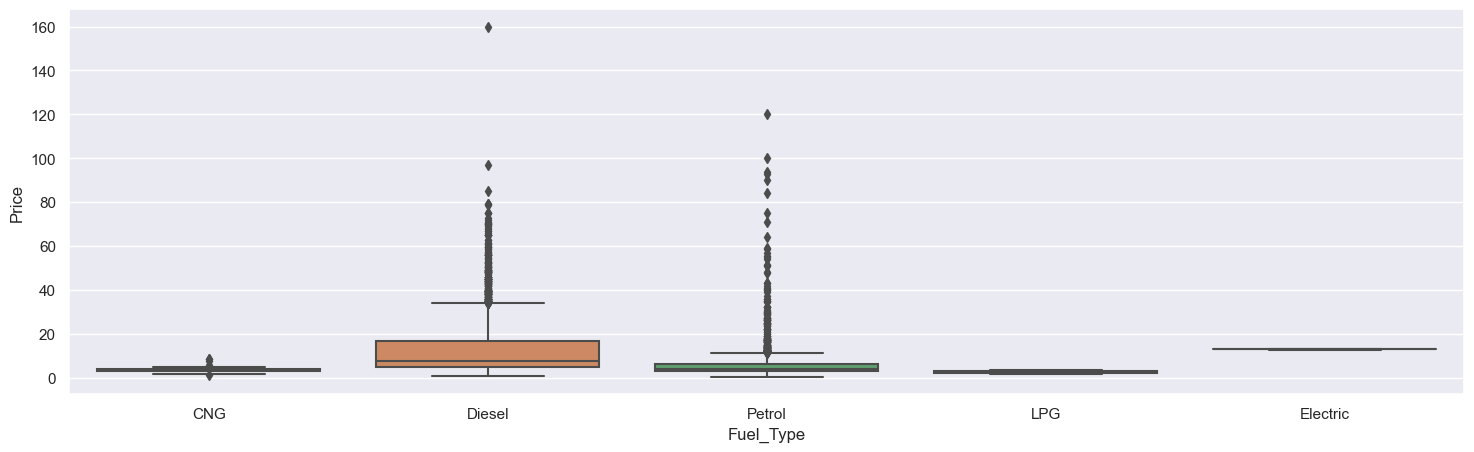

In [53]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

## Data Preprocessing (contd.)

### Missing Value Treatment

In [54]:
# check again for missing values
df.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           1
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
New_Price                   0
Price                    1233
mileage_num                83
engine_num                 46
power_num                 175
Brand                       0
Model                       0
price_log                1233
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [55]:
# imputing missing values in Seats
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [56]:
# Checking missing values in Seats
df[df["Seats"].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2369  Chennai  2008            56000.0    Petrol       Manual     Second   
3882  Kolkata  2010            40000.0    Petrol       Manual     Second   
5893  Chennai  2008            51000.0    Petrol       Manual     Second   

      Seats  New_Price  Price  mileage_num  engine_num  power_num   Brand  \
2369    NaN       7.88   1.50         19.5      1061.0        NaN  maruti   
3882    NaN       7.88   2.50         19.5      1061.0        NaN  maruti   
5893    NaN       7.88   1.75         19.5      1061.0        NaN  maruti   

       Model  price_log  new_price_log  kilometers_driven_log  
2369  estilo   0.405465       2.064328              10.933107  
3882  estilo   0.916291       2.064328              10.596635  
5893  estilo   0.559616       2.064328              10.839581

* Maruti Estilo can accommodate 5 people.

In [57]:
df["Seats"] = df["Seats"].fillna(5.0)

**Doing the same to fill missing values for the `Kilometers_Driven`, `mileage_num`, `engine_num`, and `power_num` columns.**

In [58]:
cols_list = ["Kilometers_Driven", "mileage_num", "engine_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                    1233
mileage_num                 9
engine_num                  0
power_num                  12
Brand                       0
Model                       0
price_log                1233
new_price_log               0
kilometers_driven_log       1
dtype: int64

* There are still some missing values in `mileage_num` and `power_num`.
* Imputing these missing values by taking the median grouped by the `Brand`.

In [59]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                    1233
mileage_num                 1
engine_num                  0
power_num                   2
Brand                       0
Model                       0
price_log                1233
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [60]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                    1233
mileage_num                 0
engine_num                  0
power_num                   0
Brand                       0
Model                       0
price_log                1233
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [61]:
# dropping missing values in Price column
df = df[df["Price"].notna()]

# reapplying the log transform to the new_price_num column.
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

# checking for missing values
df.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
New_Price                0
Price                    0
mileage_num              0
engine_num               0
power_num                0
Brand                    0
Model                    0
price_log                0
new_price_log            0
kilometers_driven_log    0
dtype: int64

- All missing values are dealt with.

In [62]:
# dropping the redundant columns
df.drop(columns=["Kilometers_Driven"], inplace=True)

## Linear Regression Model

In [63]:
# defining the dependent and independent variables
X = df.drop(["Price", "price_log"], axis=1)
y = df["price_log"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


In [64]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression()

### Model Performance Check

* Model performance will be done on the actual prices and not the log values.
* function that will convert the log prices to actual prices and then check the performance.
* metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* customized function to calculate MAPE and adjusted $R^2$.

In [65]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [66]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  2.737514  1.197035   0.941392        0.937458  12.97992

In [67]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  3.184134  1.326293   0.914625        0.899933  12.955532

* Both the R-squared and Adjusted R squared of our model are high and the model is able to explain up to 94% of the variance in the price of used cars.
* RMSE and MAE of train and test data are close, and are much lower than what from the models that didn't have log scale.
* MAE indicates that current model is able to predict used car prices within a mean error of 1.3 lakhs on test data.
* MAPE of 12.96 on the test data indicates that the model can predict within ~13% of the used car price.

## Observations

1. linear regression model *lin_reg_model2*, is able to capture ~94% of the variation in the data.


2. MAE indicates that current model is able to predict used car prices within a mean error of approx. 1.32 lakhs on the test data, and the MAPE indicates that the model can predict within ~13% of the used car price.

3. From the analysis, factors like the year of manufacture, numbers of seats, maximum power of the engine, etc. tend to increase the price of the used car and Factors like distance volume of engine, log of the number of kilometers driven,etc. tend to decrease the price of the used car.


## Business Insights and Recommendations

* We would have to analyze the cost side of things before we can talk about profitability in the business. Next step would be to gather more data.


* The next step post that would be to cluster different sets of data and see if making multiple models for different locations/car types is worth it.

## <a id='link1'>Appendix</a>

## Exploratory Data Analysis

### Univariate Analysis

### `Price`

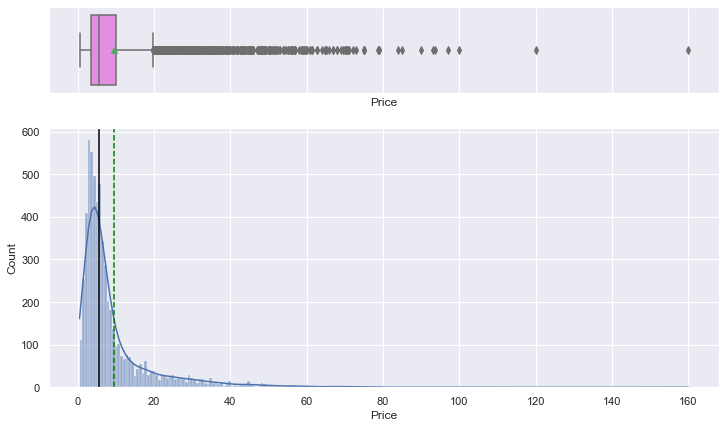

<IPython.core.display.Javascript object>

In [93]:
histogram_boxplot(df1, "Price", kde=True)

**Observations**

* This is a highly skewed distribution.
* Let us use log transformation on this column to see if that helps normalize the distribution.

In [94]:
# Creating a new column with the transformed variable
df1["price_log"] = np.log(df1["Price"])

<IPython.core.display.Javascript object>

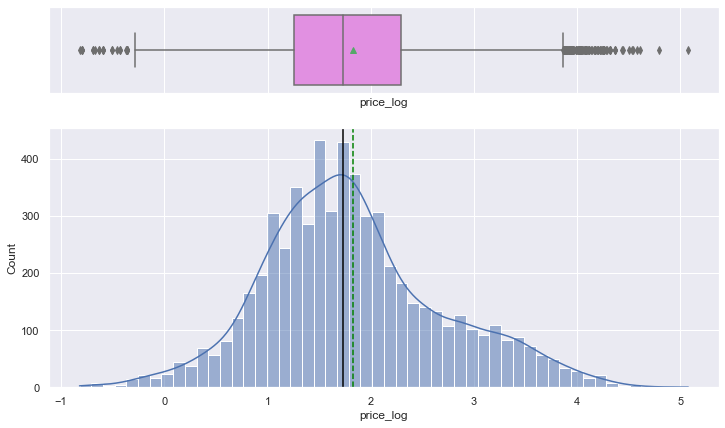

<IPython.core.display.Javascript object>

In [95]:
histogram_boxplot(df1, "price_log", kde=True)

* Using the log transformation has definitely helped in reducing the skew.

### `New_Price`

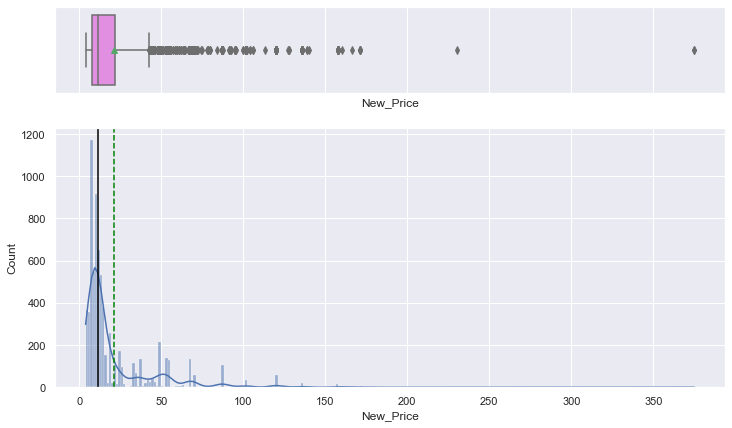

<IPython.core.display.Javascript object>

In [96]:
histogram_boxplot(df1, "New_Price", kde=True)

**Observations**

* This is another highly skewed distribution.
* Using log transformation on this column too.

In [97]:
df1["new_price_log"] = np.log(df1["New_Price"])

<IPython.core.display.Javascript object>

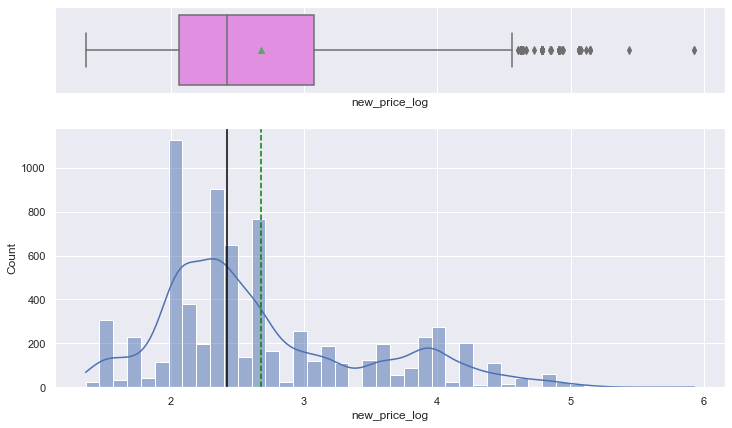

<IPython.core.display.Javascript object>

In [98]:
histogram_boxplot(df1, "new_price_log", kde=True)

* Transformation has reduced the extreme skewness.

### `Kilometers_Driven`

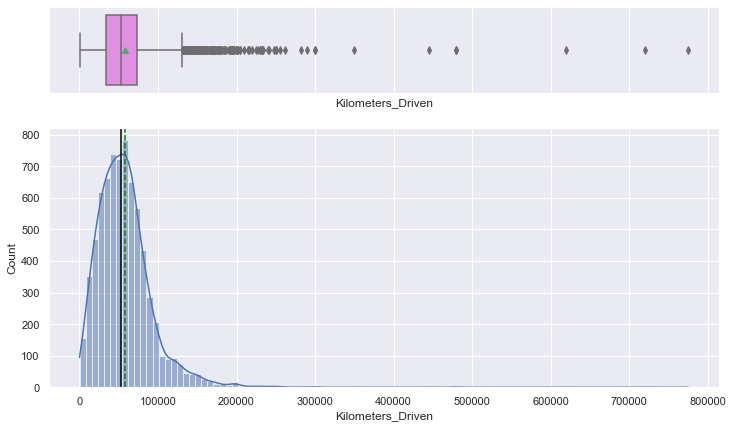

<IPython.core.display.Javascript object>

In [99]:
histogram_boxplot(df1, "Kilometers_Driven", bins=100, kde=True)

**Observations**

* This is another highly skewed distribution.

In [100]:
df1["kilometers_driven_log"] = np.log(df1["Kilometers_Driven"])

<IPython.core.display.Javascript object>

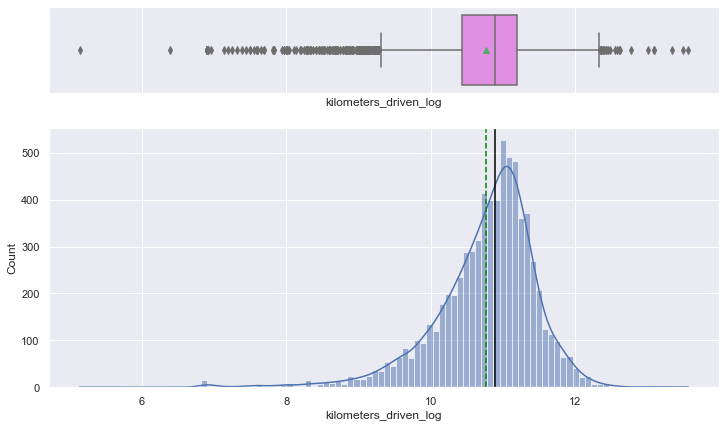

<IPython.core.display.Javascript object>

In [101]:
histogram_boxplot(df1, "kilometers_driven_log", bins=100, kde=True)

* Transformation has reduced the extreme skewness.

### `mileage_num`

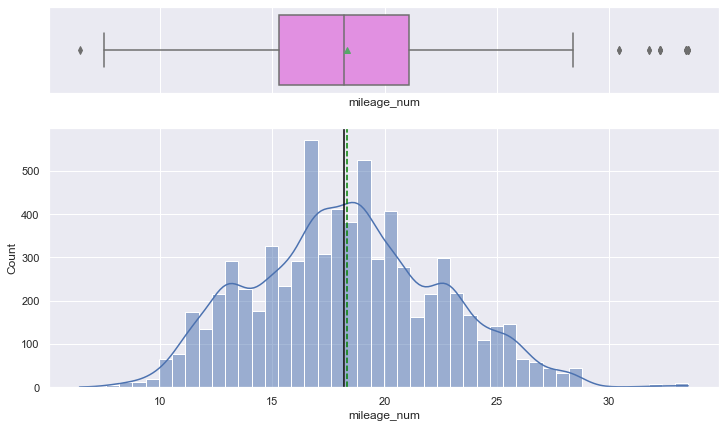

<IPython.core.display.Javascript object>

In [102]:
histogram_boxplot(df1, "mileage_num", kde=True)

**Observations**

* This is a close to normally distributed attribute.

### `engine_num`

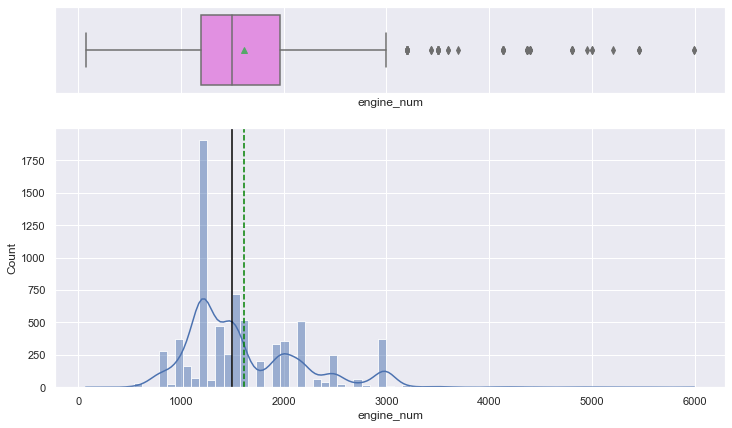

<IPython.core.display.Javascript object>

In [103]:
histogram_boxplot(df1, "engine_num", kde=True)

**Observations**

* There are a few car with a higher engine displacement volume.

### `power_num`

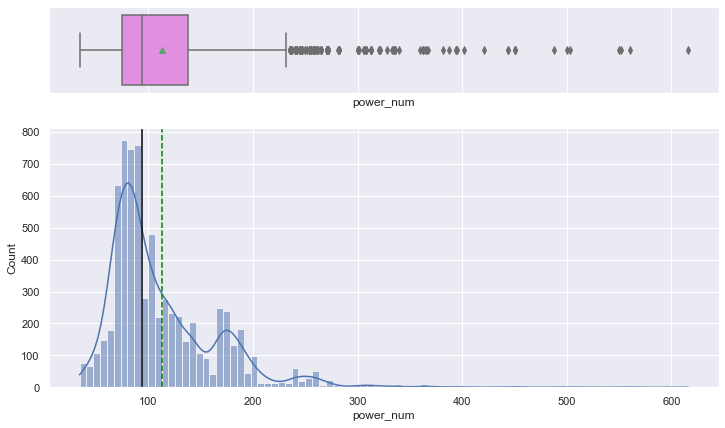

<IPython.core.display.Javascript object>

In [104]:
histogram_boxplot(df1, "power_num", kde=True)

**Observations**

* There are a few car with a higher engine power.

### `Brand`

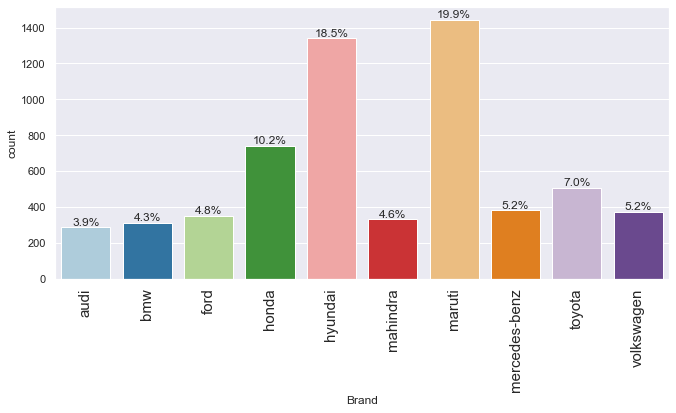

<IPython.core.display.Javascript object>

In [105]:
labeled_barplot(df1, "Brand", perc=True, n=10)

* Most of the cars in the data belong to Maruti or Hyundai.

### `Model`

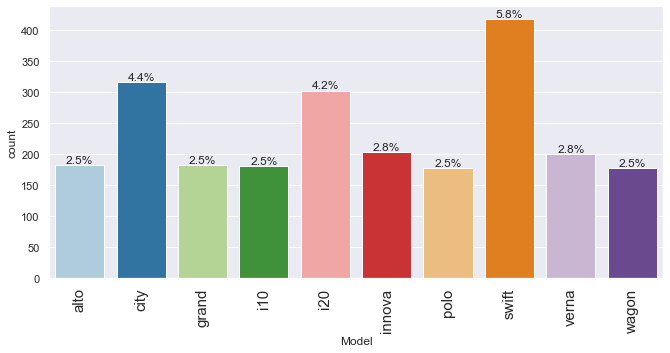

<IPython.core.display.Javascript object>

In [106]:
labeled_barplot(df1, "Model", perc=True, n=10)

**Observations**

* Maruti Swift is the most common car up for resale.

* It is clear from the above charts that the dataset contains used cars from luxury as well as budget-friendly brands.

* We could cluster all cars into the following 3 categories:

    1. Budget-Friendly
    2. Mid Range
    3. Luxury Cars

### `Seats`

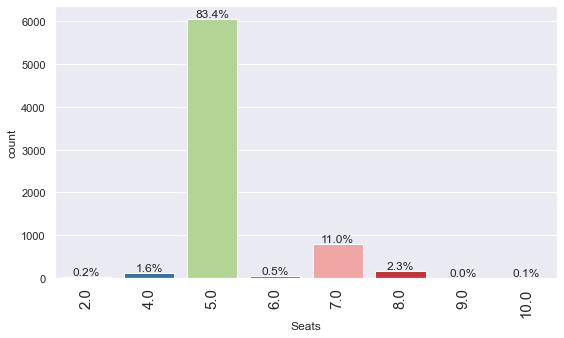

<IPython.core.display.Javascript object>

In [107]:
labeled_barplot(df1, "Seats", perc=True)

* 84% of the cars in the dataset are 5-seater cars.

### `Year`

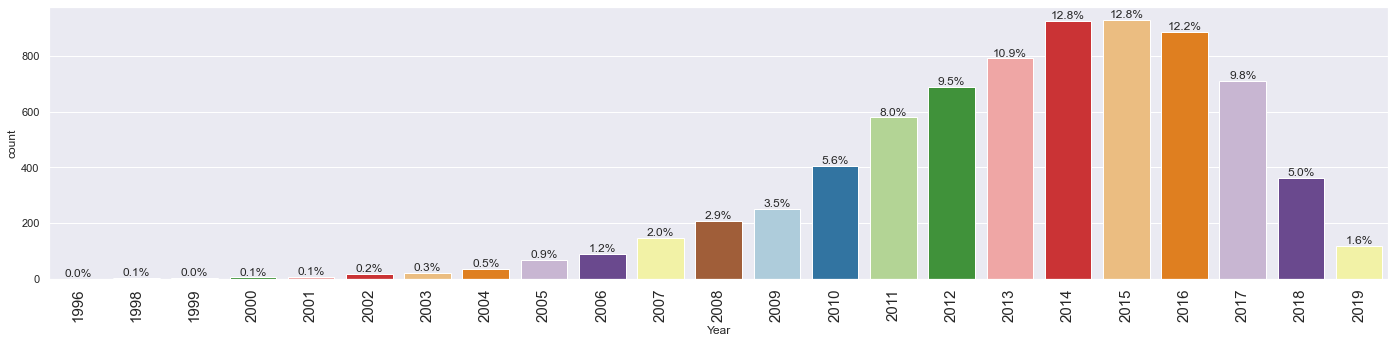

<IPython.core.display.Javascript object>

In [108]:
labeled_barplot(df1, "Year", perc=True)

* More than half the cars in the data were manufactured in or after 2014.

### `Location`

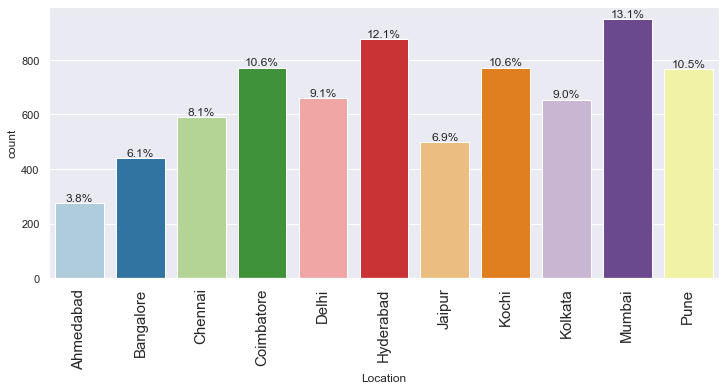

<IPython.core.display.Javascript object>

In [109]:
labeled_barplot(df1, "Location", perc=True)

* Hyderabad and Mumbai have the most demand for used cars.

### `Transmission`

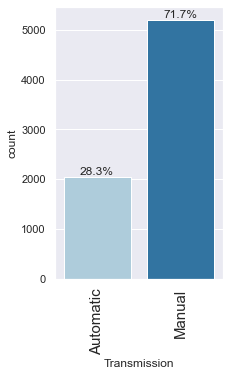

<IPython.core.display.Javascript object>

In [110]:
labeled_barplot(df1, "Transmission", perc=True)

* More than 70% of the cars have manual transmission.

### `Fuel_Type`

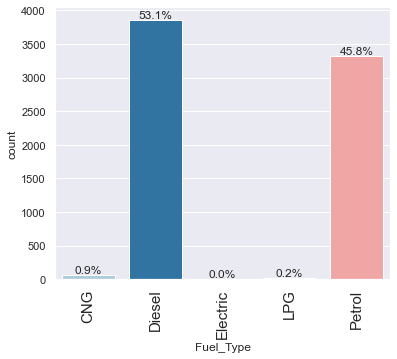

<IPython.core.display.Javascript object>

In [111]:
labeled_barplot(df1, "Fuel_Type", perc=True)

* Around 1% of the cars in the dataset do not run on diesel or petrol.

### `Owner_Type`

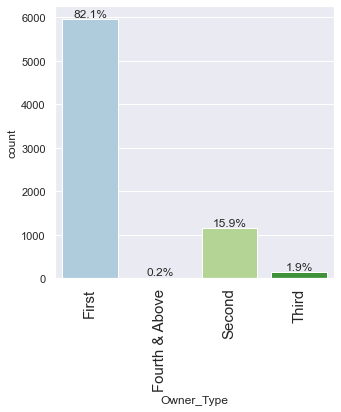

<IPython.core.display.Javascript object>

In [112]:
labeled_barplot(df1, "Owner_Type", perc=True)

* More than 80% of the used cars are being sold for the first time.

### Bivariate Distributions

**Let's check the correlation between numerical variables.**

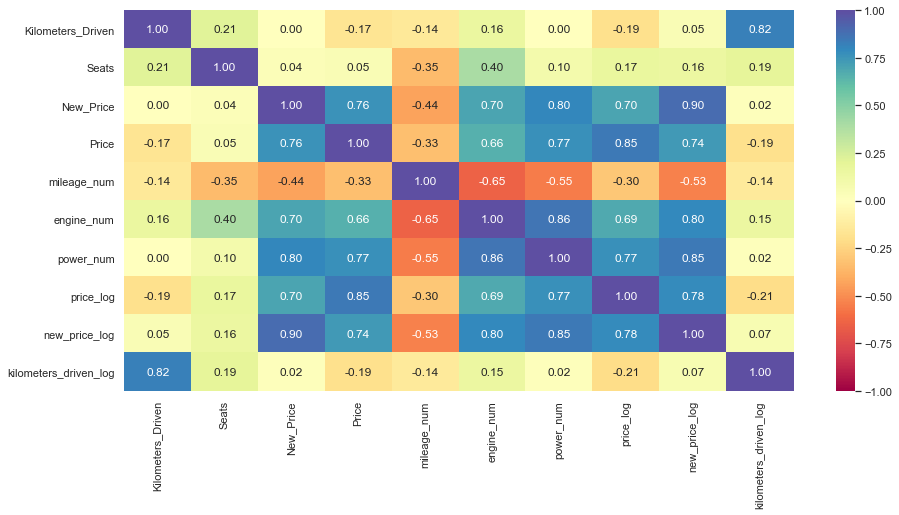

<IPython.core.display.Javascript object>

In [113]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

* `Power` and `Engine` are important predictors of used car price, but they are also highly correlated to each other.
* The price of a new car of the same model seems to be an important predictor of the used car price, which makes sense.

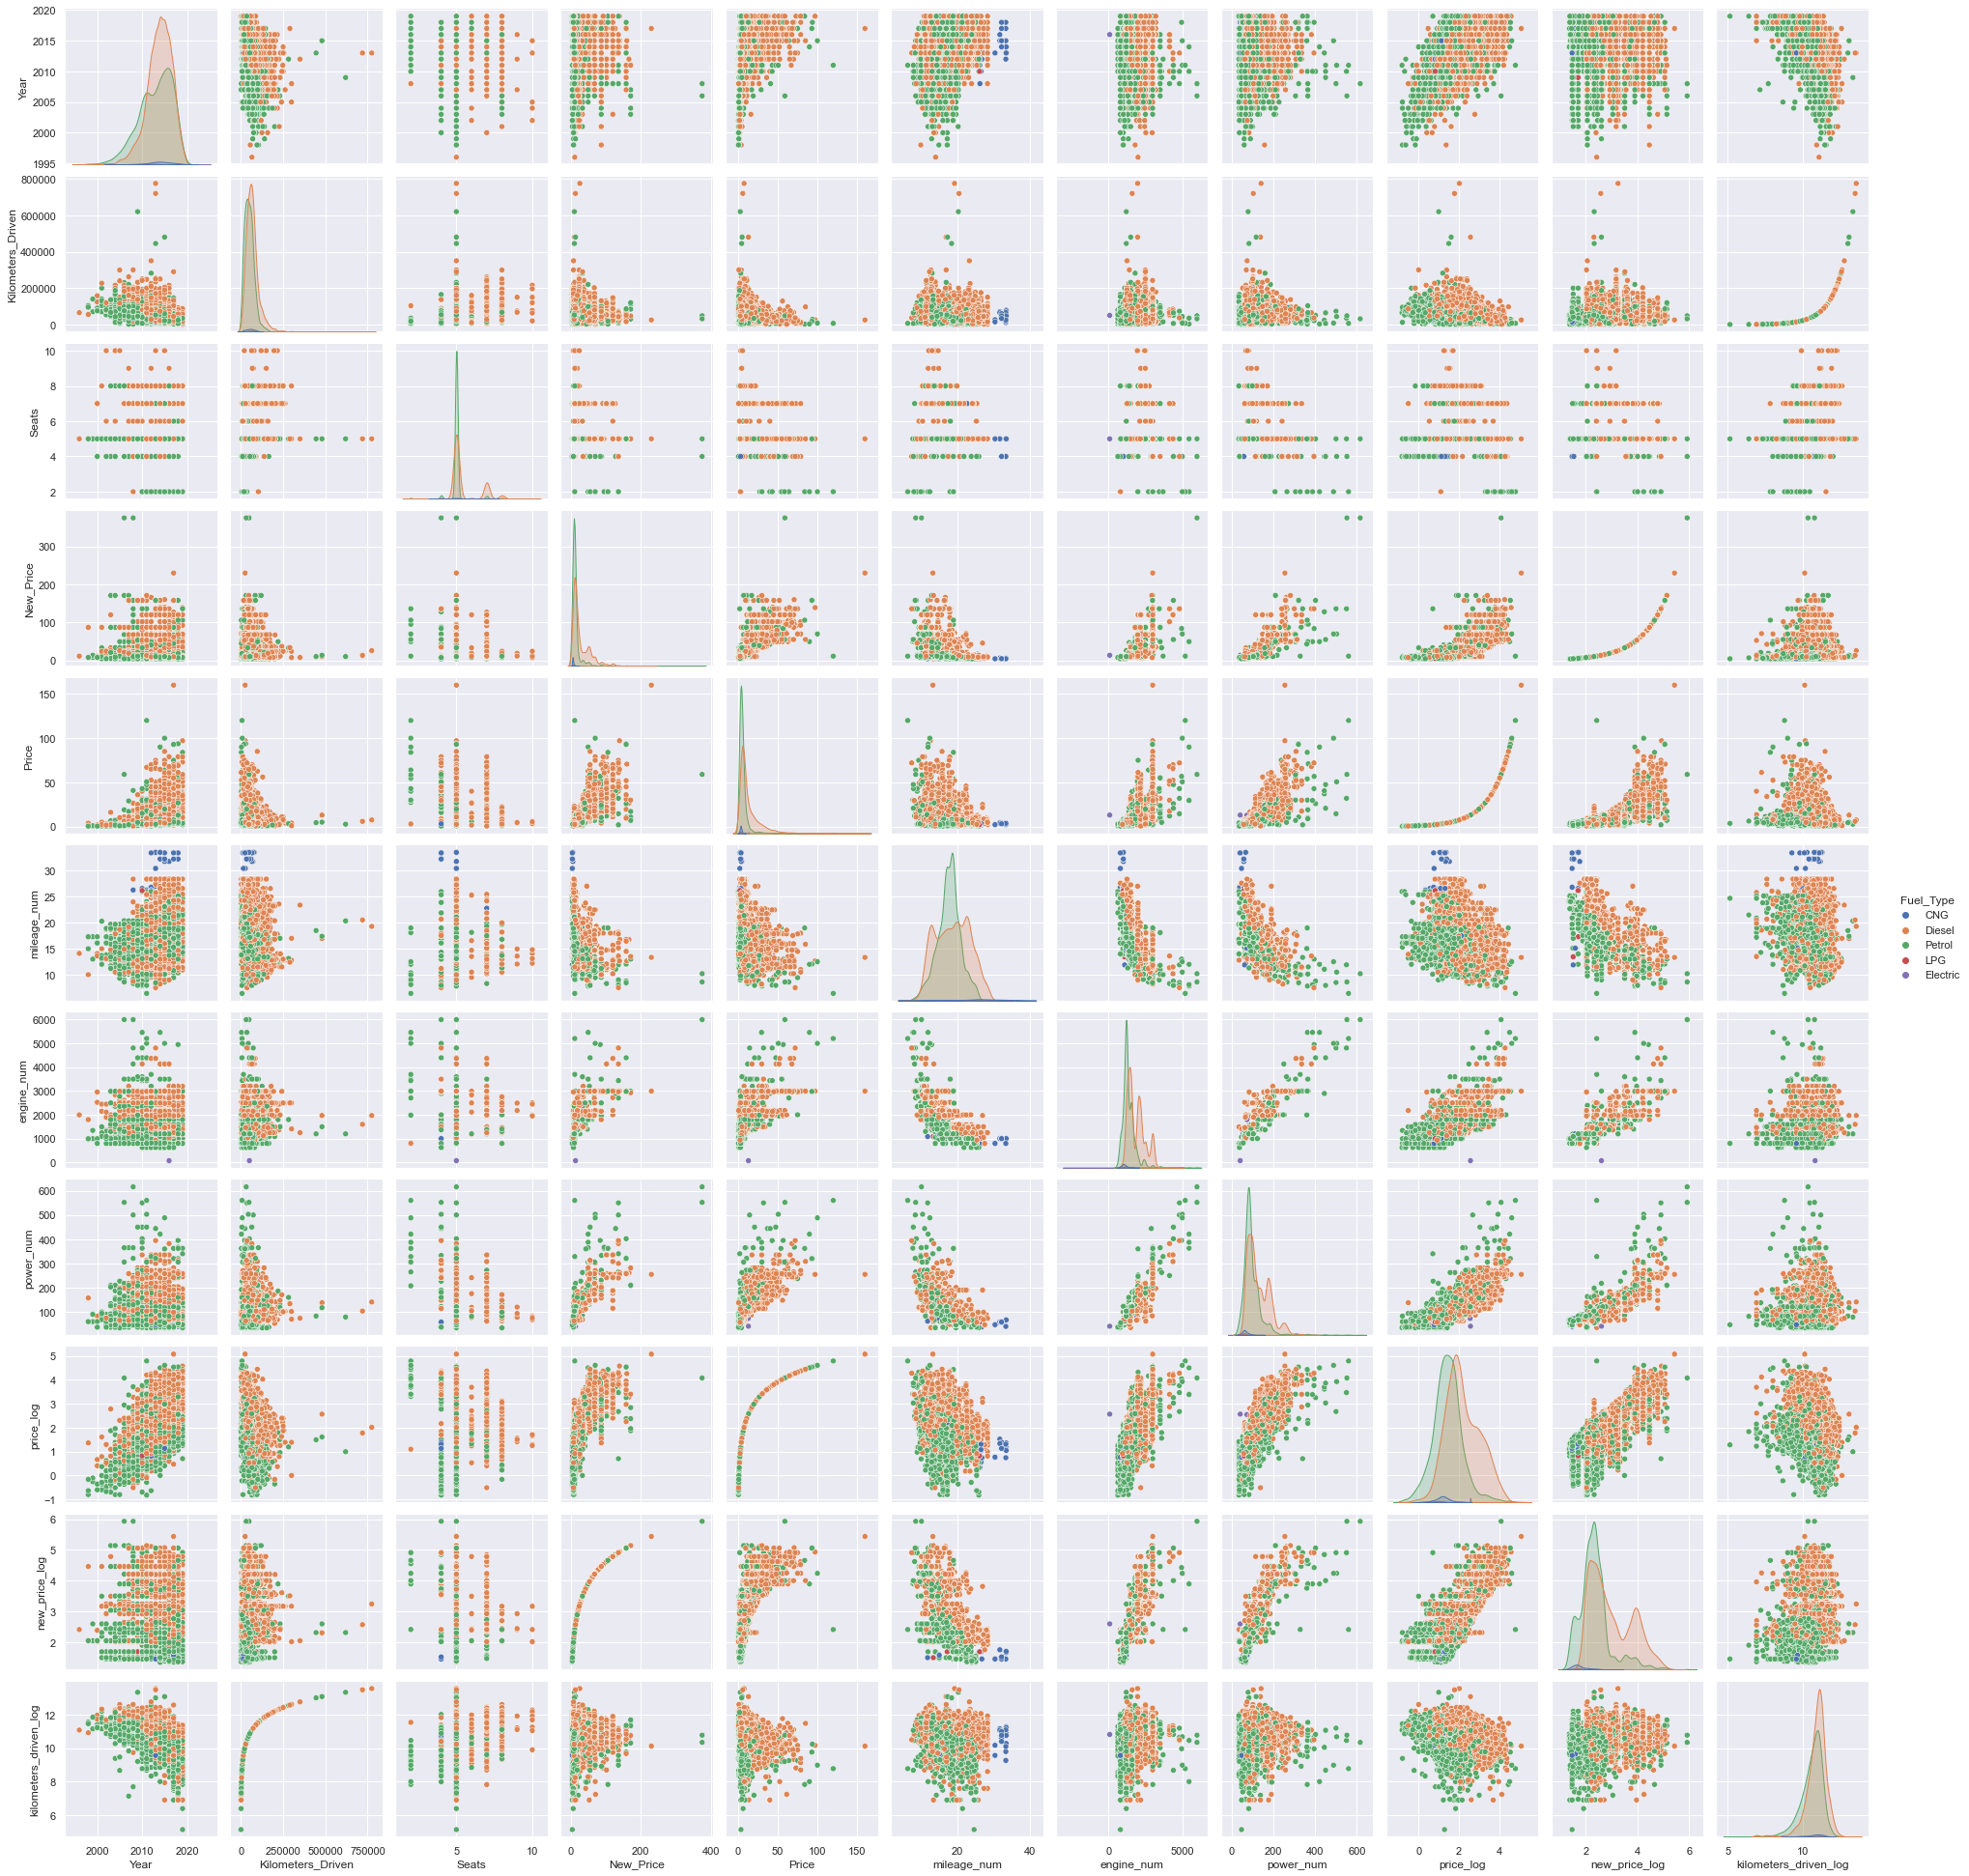

<IPython.core.display.Javascript object>

In [114]:
sns.pairplot(data=df1, hue="Fuel_Type")
plt.show()

**Observations**

Zooming into these plots gives us a lot of information.

- Contrary to intuition, `Kilometers_Driven` does not seem to have a relationship with the price.
- `Price` has a positive relationship with `Year`, i.e., the newer the car, the higher the price.
    - The temporal element of variation is captured in the year column.

- 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
- Mileage does not seem to show much relationship with the price of used cars.
- Engine displacement and power of the car have a positive relationship with the price.
- `New_Price` and used car price are also positively correlated, which is expected.
- `Kilometers_Driven` has a peculiar relationship with the `Year` variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
- CNG cars are conspicuous outliers when it comes to `Mileage`. The mileage of these cars is very high.
- The mileage and power of newer cars are increasing owing to advancements in technology.
- Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

**Let's check the variation in Price with some of the other variables.**

**`Price` vs `Location`**

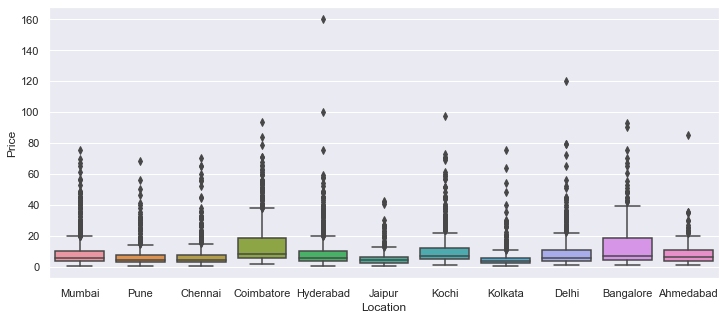

<IPython.core.display.Javascript object>

In [115]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1)
plt.show()

* The price of used cars has a large IQR in Coimbatore and Bangalore.

**`Price` vs `Year`**

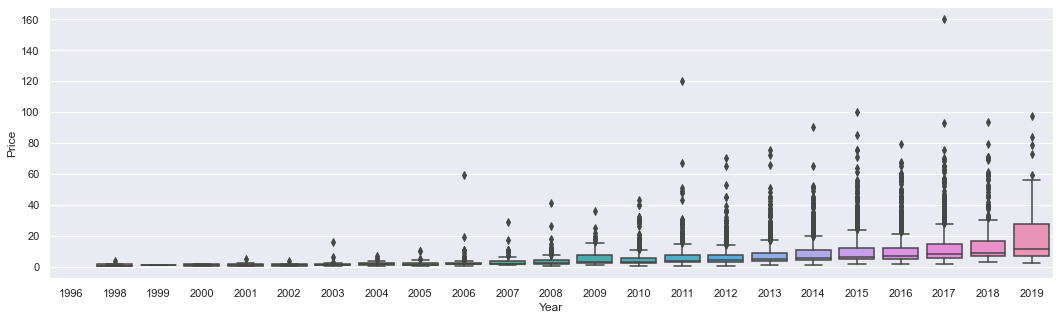

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df1)
plt.show()

* The price of used cars has increased over the years.

**`Price` vs `Brand`**

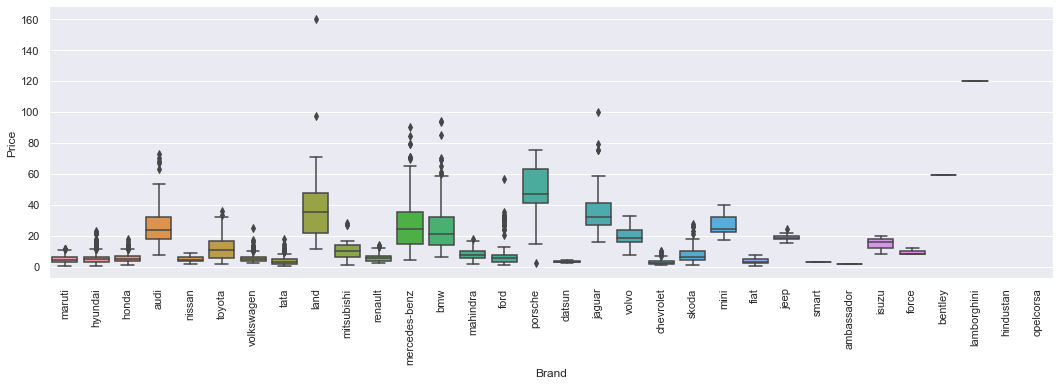

<IPython.core.display.Javascript object>

In [117]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df1)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

**`Price` vs `Transmission`**

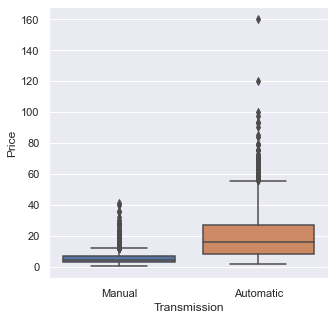

<IPython.core.display.Javascript object>

In [118]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df1)
plt.show()

* The price is higher for used cars with automatic transmission.

**`Price` vs `Fuel_Type`**

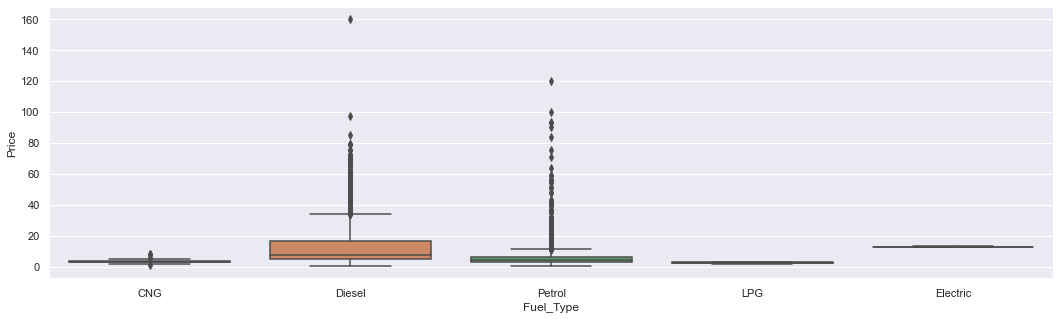

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

**`Price` vs `Owner_Type`**

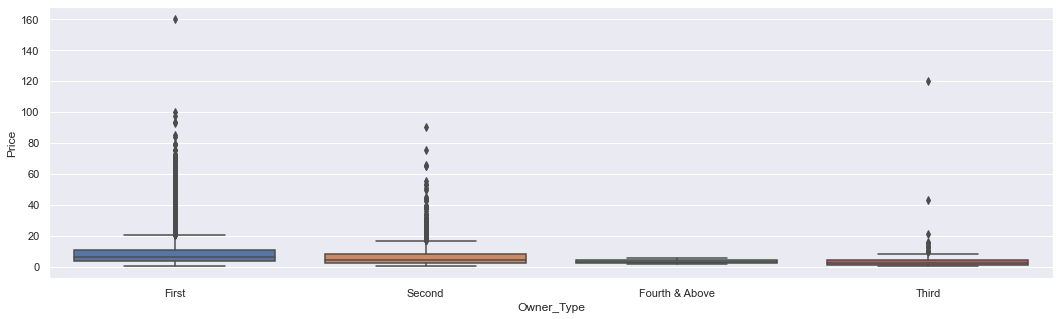

<IPython.core.display.Javascript object>

In [120]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df1)
plt.show()

* The price of cars decreases as they keep getting resold.